In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [45]:
df_raw = pd.read_csv("Data/concept2-season-2020.csv")

In [49]:
# columns to drop (empty, duplicated values or constant)
col_to_drop = [
    "Stroke Count", #empty
    "Avg Heart Rate", #empty
    "Comments", #empty
    "Weight", #constant
    "Type", #constant
    "Ranked", #constant
    "Work Time (Formatted)", #duplicate
    "Rest Time (Formatted)", #duplicate
    "Age", #constant
    "Cal/Hour", #duplicate
]
df = df_raw.drop(col_to_drop, axis="columns")

# renaming based on preferences
dict_naming = {
    "ID": "session_id",
    "Description": "session_type",
    "Date": "session_timestamp",
    "Work Time (Seconds)": "time_work_in_s",
    "Rest Time (Seconds)": "time_rest_in_s",
    "Work Distance": "distance_work_in_m",
    "Rest Distance": "distance_rest_in_m",
    "Stroke Rate/Cadence": "spm",
    "Pace": "time_split",
    "Total Cal": "cal_burned",
    "Drag Factor": "drag_factor",
    "Avg Watts": "power_in_avg_w",
}
df.rename(columns=dict_naming, inplace=True)

# fill NaN values from sessions without rest with 0 (rest but equal to 0)
dict_nan = {
    'time_rest_in_s':0,
    'distance_rest_in_m':0
}
df.fillna(value=dict_nan, inplace=True)

# split date and time into two columns
df["session_timestamp"] = pd.to_datetime(df["session_timestamp"])
df["session_date"] = df["session_timestamp"].dt.date
df["session_time"] = df["session_timestamp"].dt.time
df.drop('session_timestamp',axis="columns", inplace= True)

# retrieve chrono time as the proper dtype
df["time_split"] = pd.to_datetime(df["time_split"]).dt.time

,session_id,session_type,time_work_in_s,time_rest_in_s,distance_work_in_m,distance_rest_in_m,spm,time_split,power_in_avg_w,cal_burned,drag_factor,session_date,session_time
0,42587184,v1000m/1:00r...10 row,752.6,600.0,3200,584.0,27,01:57:30,215,219,116,2019-12-10,18:37:00
1,42587183,5000m row,1425.7,0.0,5000,0.0,23,02:22:30,121,296,111,2019-12-09,08:43:00
2,42587182,5000m row,1404.7,0.0,5000,0.0,22,02:20:24,126,308,115,2019-12-07,14:24:00
3,42587179,10000m row,2764.8,0.0,10000,0.0,23,02:18:12,132,595,113,2019-11-29,09:07:00
4,42587178,5000m row,1400.3,0.0,5000,0.0,23,02:20:00,127,307,111,2019-11-27,09:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,38440897,10:02 row,602.7,0.0,1902,0.0,17,02:38:24,88,100,109,2019-05-12,14:10:00
101,38440896,3x500m/1:00r row,372.2,180.0,1500,60.0,22,02:04:00,183,95,109,2019-05-12,13:57:00
102,38440893,3x4:00/1:00r row,720.0,180.0,2728,37.0,24,02:11:54,152,163,107,2019-05-07,17:59:00
103,38440890,5:05 row,305.1,0.0,1034,0.0,23,02:27:30,109,56,109,2019-05-05,10:24:00


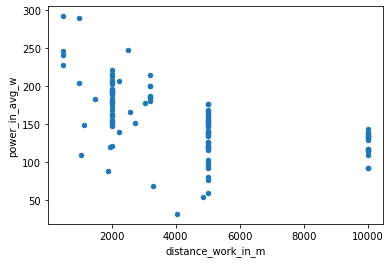

In [22]:
df.plot(x="distance_work_in_m", y="power_in_avg_w", kind="scatter")
y_avg = np.average(df["power_in_avg_w"])
plt.show()


In [23]:
print(df["Pace"])


KeyError: 'Pace'